# Introduction to Matplotlib and Seaborn

## Goals
-----
* understand the central concepts for plotting beautiful figures using matplotlib
* get used to seaborn as a higher level plotting package


This week we will be using the packages `matplotlib` and `seaborn` to visualise our breast cancer dataset from last week. It's important to be able to both visualise data (usually from dataframes) and plot results of any analysis you have carried out on the data. The plotting functions you use in these two scenarios will overlap a considerable amount, so we will just focus on generating plots to visualise the original data, without doing too much processing of the data first. 

### Loading the required modules and data

We will need a few more modules than we have on previous weeks, as you can see below. We also import the same data that we used last week (the METABRIC dataset).

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

A quick note for anyone who has seen The West Wing - by convention `seaborn` is imported as `sns`. This is a joked initialism relating to Samuel Norman 'Sam' Seaborn who is a character on The West Wing. The creator of the seaborn package has also written other packages such as `moss` (Donna Moss) and `lyman` (Josh Lyman).

In [3]:
metabric = pd.read_csv('https://raw.githubusercontent.com/AstraZeneca-Code-Club/intermediate_python/main/metabric_clinical_and_expression_data.csv')
metabric.head()

,Patient_ID,Cohort,Age_at_diagnosis,Survival_time,Survival_status,Vital_status,Chemotherapy,Radiotherapy,Tumour_size,Tumour_stage,...,Integrative_cluster,Mutation_count,ESR1,ERBB2,PGR,TP53,PIK3CA,GATA3,FOXA1,MLPH
0,MB-0000,1,75.65,140.500000,LIVING,Living,NO,YES,22.0,2.0,...,4ER+,NaN,8.929817,9.333972,5.680501,6.338739,5.704157,6.932146,7.953794,9.729728
1,MB-0002,1,43.19,84.633333,LIVING,Living,NO,YES,10.0,1.0,...,4ER+,2.0,10.047059,9.729606,7.505424,6.192507,5.757727,11.251197,11.843989,12.536570
2,MB-0005,1,48.87,163.700000,DECEASED,Died of Disease,YES,NO,15.0,2.0,...,3,2.0,10.041281,9.725825,7.376123,6.404516,6.751566,9.289758,11.698169,10.306115
3,MB-0006,1,47.68,164.933333,LIVING,Living,YES,YES,25.0,2.0,...,9,1.0,10.404685,10.334979,6.815637,6.869241,7.219187,8.667723,11.863379,10.472181
4,MB-0008,1,76.97,41.366667,DECEASED,Died of Disease,YES,YES,40.0,2.0,...,9,2.0,11.276581,9.956267,7.331223,6.337951,5.817818,9.719781,11.625006,12.161961


To recap from last time - the rows in a `DataFrame` are the **observations** (patients in the case of METABRIC) whereas columns are the observed **variables**.

In [5]:
metabric.columns

Index(['Patient_ID', 'Cohort', 'Age_at_diagnosis', 'Survival_time',
       'Survival_status', 'Vital_status', 'Chemotherapy', 'Radiotherapy',
       'Tumour_size', 'Tumour_stage', 'Neoplasm_histologic_grade',
       'Lymph_nodes_examined_positive', 'Lymph_node_status', 'Cancer_type',
       'ER_status', 'PR_status', 'HER2_status', 'HER2_status_measured_by_SNP6',
       'PAM50', '3-gene_classifier', 'Nottingham_prognostic_index',
       'Cellularity', 'Integrative_cluster', 'Mutation_count', 'ESR1', 'ERBB2',
       'PGR', 'TP53', 'PIK3CA', 'GATA3', 'FOXA1', 'MLPH'],
      dtype='object')

### Using matplotlib to visualise our data

Let's first plot a simple bar plot showing the distribution of tumour stage in the patients.

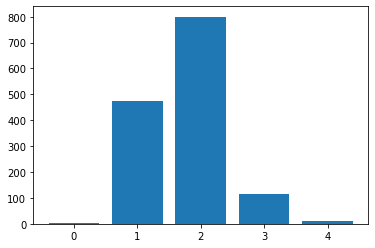

In [27]:
labels, counts = np.unique(metabric['Tumour_stage'].dropna(), return_counts = True)
plt.bar(labels, counts, align='center')
plt.show()

This plot gives us the basic information if we are looking at it as part of this whole notebook. However, you will often be generating plots to include in presentations or posters, and will therefore need to add more information to the plot.

If you are not just using a set figure such as `plt.hist` and instead want to be able to personalise the figure, it is better to set up the figure as below:

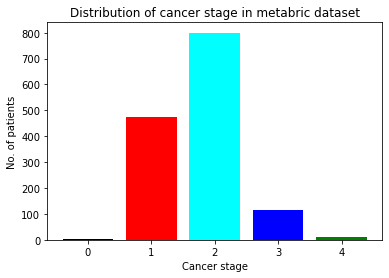

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111) #row-col-num
ax.bar(labels, counts, align='center', color=['black', 'red', 'cyan', 'blue', 'green'])
ax.set(title = 'Distribution of cancer stage in metabric dataset',
       ylabel = 'No. of patients',
       xlabel = 'Cancer stage')
plt.show()

Now that we've adapted the plot to our personal requirements, we would like to export the image so that we can use it for example in a presentation. We do this by just adding one more line to our existing code.

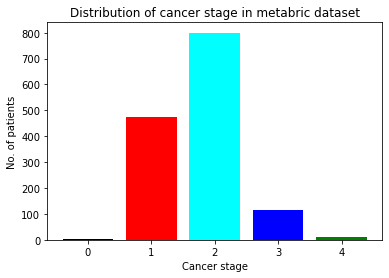

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.bar(labels, counts, align='center', color=['black', 'red', 'cyan', 'blue', 'green'])
ax.set(title = 'Distribution of cancer stage in metabric dataset',
       ylabel = 'No. of patients',
       xlabel = 'Cancer stage')
plt.savefig('cancer_stage.png')
plt.show()

#### Exercise 1

- Generate a scatter plot with `FOXA1` on the x-axis and `MLPH` on the y-axis
- Add figure and axes titles
- Change the points to be red '+' signs, instead of the standard blue dots
- Save the figure as a .png file

Extension: This figure may be too small for people to read properly. Change the size of the figure to be 8cm across by 6cm down.

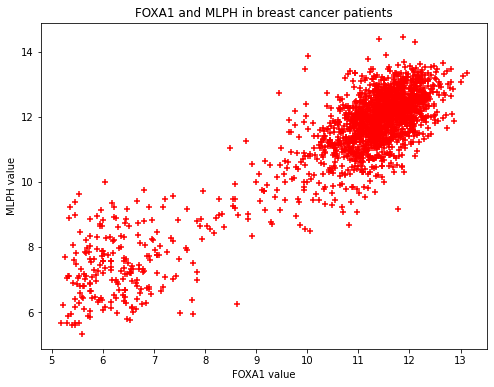

In [44]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111) 
ax.scatter(metabric['FOXA1'], metabric['MLPH'], marker='+', color='red')
ax.set(title = 'FOXA1 and MLPH in breast cancer patients',
       ylabel = 'MLPH value',
       xlabel = 'FOXA1 value')
plt.savefig('test_figure.png')
plt.show()

### Doing multiple plots at once:

`matplotlib` allows us to create subplots within a figure and to display different things in each of these subplots. We will use this to generate some more types of plots in `matplotlib`.

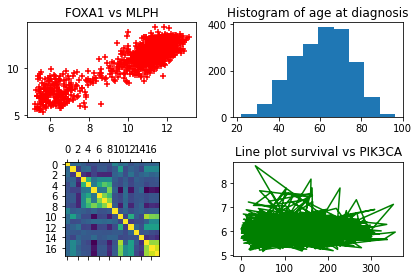

In [70]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(metabric['FOXA1'], metabric['MLPH'], marker='+', color='red')
axs[0, 0].set_title('FOXA1 vs MLPH')
axs[0, 1].hist(metabric['Age_at_diagnosis'])
axs[0, 1].set_title('Histogram of age at diagnosis')
axs[1, 0].matshow(metabric.corr())
axs[1, 1].plot(metabric['Survival_time'], metabric['PIK3CA'], 'tab:red', color='green')
axs[1, 1].set_title('Line plot survival vs PIK3CA')
fig.tight_layout() # without this the x-ticks would overlap with the bottom row titles

#### Drawbacks of matplotlib:

- basic data manipulation
- can't sort based on a column value
- not particularly well suited to dealing with DataFrames
- not that easy to adapt aesthetics past colours

Let's see how `seaborn` can be used as a wrapper around matplotlib to extend the functionality and create better figures.